# Load in data

In [1]:
from root_pandas import read_root
from uncertainties import ufloat
import pandas as pd
from BDT.XGBoostTrainer import XGBoostTrainer
from ModifyNTuple.add_variables import manage_variables, clnu_BR, fill_nan_Xc_col, ulnu_BR, add_b2u_weights

Welcome to JupyROOT 6.18/00


In [2]:
#output_path = '/Users/caolu/Workspace/Belle/kekcc/jupyter/kit_storage/20190516_BGM/new_BDT/new_2020/'

#output_path = "/Users/caolu/Workspace/Belle/kekcc/jupyter/kit_storage/20190516_BGM/new_BDT/new_0807_new_gap/"
output_path = '/scratch/lcao1/Mac_code/dataset_2020/BDT/output_0925/'

In [3]:
mainpath = '/scratch/lcao1/Mac_code/dataset_2020/'
#mainpath ='/Users/caolu/Workspace/Belle/kekcc/jupyter/kit_storage/'

df_clnu_ch = read_root(mainpath + 'mc_generic/mcCorr/output_charged_generic_20200917_5s_all_mcCorr.root','tree',where='presel_gen==1')

In [4]:
df_clnu_md = read_root(mainpath + 'mc_generic/mcCorr/output_mixed_generic_20200917_5s_all_mcCorr.root','tree',where='presel_gen==1')

In [5]:
df_uds = read_root(mainpath + 'mc_generic/mcCorr/output_uds_generic_20200917_5s_all_mcCorr.root','tree',where='presel_gen==1')
df_charm = read_root(mainpath + 'mc_generic/mcCorr/output_charm_generic_20200917_5s_all_mcCorr.root','tree',where='presel_gen==1')

df_dstst_ch = read_root(mainpath + 'Dstst/mcCorr/merge/Dstst_ch_5s_20200917_all_mcCorr_FF.root', 'tree',where='presel_gen==1')
df_dstst_md = read_root(mainpath + 'Dstst/mcCorr/merge/Dstst_md_5s_20200917_all_mcCorr_FF.root', 'tree',where='presel_gen==1')


df_gap_ch = read_root(mainpath + 'gap/mcCorr/merge/Gap_ch_5s_20200917_all_mcCorr_FF.root', 'tree',where='presel_gen==1')
df_gap_md = read_root(mainpath + 'gap/mcCorr/merge/Gap_md_5s_20200917_all_mcCorr_FF.root', 'tree',where='presel_gen==1')


In [6]:
Dlnu_ch_BGM_ffs = pd.read_pickle(mainpath + 'mc_generic/mcCorr/FF_Dlnu_ch_20200917_5s_presel.pickle')
Dlnu_md_BGM_ffs = pd.read_pickle(mainpath + 'mc_generic/mcCorr/FF_Dlnu_md_20200917_5s_presel.pickle')

Dstlnu_ch_BGM_ffs = pd.read_pickle(mainpath + 'mc_generic/mcCorr/FF_Dstlnu_ch_20200917_5s_presel.pickle')
Dstlnu_md_BGM_ffs = pd.read_pickle(mainpath + 'mc_generic/mcCorr/FF_Dstlnu_md_20200917_5s_presel.pickle')

df_clnu_ch = pd.concat([df_clnu_ch, Dlnu_ch_BGM_ffs, Dstlnu_ch_BGM_ffs], axis=1)
df_clnu_md = pd.concat([df_clnu_md, Dlnu_md_BGM_ffs, Dstlnu_md_BGM_ffs], axis=1)

In [7]:
del Dlnu_ch_BGM_ffs, Dstlnu_ch_BGM_ffs, Dlnu_md_BGM_ffs, Dstlnu_md_BGM_ffs

In [8]:
df_ulnu_ch_hy = read_root(mainpath + 'mc_ulnu/combined_hybrid/output_hybrid_charged_DFNssCen_20200917_10s_all_mcCorr_FF_wHySys.root','tree',where='presel_gen==1')
df_ulnu_md_hy = read_root(mainpath + 'mc_ulnu/combined_hybrid/output_hybrid_mixed_DFNssCen_20200917_10s_all_mcCorr_FF_wHySys.root','tree',where='presel_gen==1')



In [9]:
df_ulnu_ch_hy = ulnu_BR(df_ulnu_ch_hy, 'truth_xu_pdg')
df_ulnu_ch_hy= add_b2u_weights(df_ulnu_ch_hy)

df_ulnu_md_hy = ulnu_BR(df_ulnu_md_hy, 'truth_xu_pdg')
df_ulnu_md_hy= add_b2u_weights(df_ulnu_md_hy)

In [10]:
# add weights counting for f++/f00 ratio B+B- to B0BOb at Upsilon FourS
fpluszero = ufloat(1.058, 0.024)

C_Bplus = 2*fpluszero/(1+fpluszero)
C_Bzero = 2/(1+fpluszero)

# the effct is acounted in tagging calibration
# need to remove double-counting: reweight slef-made MC produced with fpluszero back to 1:1 (old generic produced B±: B0 = 1:1)
df_clnu_ch['C_B_fcen'] = 1
df_clnu_md['C_B_fcen'] = 1

df_dstst_ch['C_B_fcen'] = 1/C_Bplus.nominal_value
df_dstst_md['C_B_fcen'] = 1/C_Bzero.nominal_value
df_gap_ch['C_B_fcen'] = 1/C_Bplus.nominal_value
df_gap_md['C_B_fcen'] = 1/C_Bzero.nominal_value


In [7]:
#base = '/home/sutclw/Work/Analysis/b2ulnu/Data/B2GM_June_2019/20190516_BGM_2/'

#df_clnu_md = read_root(base +'generic/s0/tag_corr/bingen_md_s0_pre_selected_20190516_tagCorr.root','tree')
#df_clnu_ch = read_root(base +'generic/s0/tag_corr/bingen_ch_s0_pre_selected_20190516_tagCorr.root','tree')

#Dlnu_ch_BGM_ffs = pd.read_pickle(base + 'generic/s0/clnu_FF/Dlnu_ch_BGM_ffs.pickle')
#Dlnu_md_BGM_ffs = pd.read_pickle(base + 'generic/s0/clnu_FF/Dlnu_md_BGM_ffs.pickle')
#Dstlnu_ch_BGM_ffs = pd.read_pickle(base + 'generic/s0/clnu_FF/Dstlnu_ch_BGM_ffs.pickle')
#Dstlnu_md_BGM_ffs = pd.read_pickle(base + 'generic/s0/clnu_FF/Dstlnu_md_BGM_ffs.pickle')

#df_dstst_ch = read_root(base + 'Dstst/s0/pre_sel_generic/Dstst_ch_s0_20190516_pre_selected_tagCorr.root', 'tree')
#df_dstst_md = read_root(base + 'Dstst/s0/pre_sel_generic/Dstst_md_s0_20190516_pre_selected_tagCorr.root', 'tree')
#df_dstst_ch = read_root(base + 'Dstst/Dstst_FFs/Dstst_ch_s0_pre_selected_20190516_FF.root', 'tree')
#df_dstst_md = read_root(base + 'Dstst/Dstst_FFs/Dstst_md_s0_pre_selected_20190516_FF.root', 'tree')
#df_gap_ch = read_root(base + 'Gap/s0/Gap_ch_s0_pre_selected_20190516_tagCorr.root', 'tree')
#df_gap_md = read_root(base + 'Gap/s0/Gap_md_s0_pre_selected_20190516_tagCorr.root', 'tree')
#df_clnu_ch = pd.concat([df_clnu_ch, Dlnu_ch_BGM_ffs, Dstlnu_ch_BGM_ffs], axis=1)
#df_clnu_md = pd.concat([df_clnu_mc, Dlnu_mc_BGM_ffs, Dstlnu_mc_BGM_ffs], axis=1)

In [7]:
#df_ulnu_ch_hy = read_root(mainpath + '20190516_BGM/signal/hybrid_v2/output_mc_ulnu_hybrid_charged_20190516_10s_presel_tagCorr.root','tree')
#df_ulnu_md_hy = read_root(mainpath + '20190516_BGM/signal/hybrid_v2/output_mc_ulnu_hybrid_mixed_20190516_10s_presel_tagCorr.root','tree')
#df_ulnu_md_hy = read_root('/home/sutclw/testcopy/output_mc_ulnu_hybrid_mixed_20190516_10s_presel_tagCorr.root','tree')
#f_ulnu_ch_hy = read_root('/home/sutclw/testcopy/output_mc_ulnu_hybrid_charged_20190516_10s_presel_tagCorr.root','tree')

In [8]:

#df_clnu_ch = pd.concat([df_clnu_ch, Dlnu_ch_BGM_ffs, Dstlnu_ch_BGM_ffs], axis=1)
#df_clnu_md = pd.concat([df_clnu_md, Dlnu_md_BGM_ffs, Dstlnu_md_BGM_ffs], axis=1)

In [11]:
len(df_dstst_ch)+len(df_dstst_md)+len(df_gap_ch)+len(df_gap_md)

834298

In [7]:
def check(df):
    xlv_decay = abs(df.event_lclass) ==2
    gap = xlv_decay & (df.event_dclass.isin([2,4,9,10]))
    dstst = xlv_decay & (df.event_dclass.isin([5,6,7,8]))
    df_mask = df[dstst]
    return df_mask

len(check(df_clnu_ch)) +len(check(df_clnu_md))

166958

In [9]:
len(df_clnu_ch) /len(df_clnu_md)

1.269018359531232

In [12]:
df_clnu_md['sample_type'] = 1 # old charged generic
df_clnu_ch['sample_type'] = 2 # old mixed generic
df_charm['sample_type'] = 3   # charm
df_uds['sample_type'] = 4     # uds
df_dstst_ch['sample_type'] = 5 # new D** charged
df_dstst_md['sample_type'] = 6 # new D** mixed
df_gap_ch['sample_type'] = 7   # new gap charged
df_gap_md['sample_type'] = 8   # new gap mixed

In [13]:
def mask_dstst_gap(df):
    
    xlv_decay = abs(df.event_lclass) ==2
    
    gap = xlv_decay & (df.event_dclass.isin([2,4]))  # Dpi, Dstarpi
    dstst = xlv_decay & (df.event_dclass.isin([5,6,7,8]))  # D1, D2star, Dstar0, Dp1
    d2s = xlv_decay & (df.event_dclass.isin([9,10])) # D_2S, Dstar_2S
    # skip above
    df_mask = df[~(gap|dstst|d2s)]
    return df_mask

df_clnu_md_mask = mask_dstst_gap(df_clnu_md)
df_clnu_ch_mask = mask_dstst_gap(df_clnu_ch)
del df_clnu_md, df_clnu_ch

df_clnu_md = pd.concat([df_clnu_md_mask, df_dstst_md, df_gap_md], sort=True)
df_clnu_ch = pd.concat([df_clnu_ch_mask, df_dstst_ch, df_gap_ch], sort=True)


In [14]:
del df_clnu_md_mask, df_dstst_md, df_gap_md, df_clnu_ch_mask, df_dstst_ch, df_gap_ch

In [15]:
df_clnu_md = clnu_BR(df_clnu_md)
df_clnu_ch = clnu_BR(df_clnu_ch)

In [16]:
df_charm = fill_nan_Xc_col(df_charm)
df_uds = fill_nan_Xc_col(df_uds)
df_ulnu_ch_hy = fill_nan_Xc_col(df_ulnu_ch_hy)
df_ulnu_md_hy = fill_nan_Xc_col(df_ulnu_md_hy)

In [17]:
df_clnu_md = manage_variables(df_clnu_md)
df_clnu_ch = manage_variables(df_clnu_ch)

df_ulnu_ch_hy = manage_variables(df_ulnu_ch_hy)
df_ulnu_md_hy = manage_variables(df_ulnu_md_hy)

df_charm = manage_variables(df_charm)
df_uds = manage_variables(df_uds)

/gpfs/share/home/lcao1/.local/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
def get_all_norm_w(df):
    tot_central_weight = 1.
    
    for i in ['PID_w_0', 'ks_w_0', 'slowpi_w_0', 'tag_w_0', 
              'hybrid_weights', '_b2u_FF_weight_',
              'C_B_fcen',
              'Xc_BR_0',
              'Dlnu_FF_weight', 
              'Dstlnu_FF_weight', 
              'FF_Done_nominal','FF_Dprimeone_nominal','FF_Dzerostar_nominal','FF_Dtwostar_nominal'
             ]:
        
        if i in df.columns:
            
            if df[i].isnull().any() :
            
                df[i] = df[i].fillna(1)
            tot_central_weight *= df[i]
           
     
    df['tot_w_0'] = tot_central_weight
    return df


In [19]:
df_clnu_md = get_all_norm_w(df_clnu_md)
df_clnu_ch = get_all_norm_w(df_clnu_ch)
df_charm = get_all_norm_w(df_charm)
df_uds = get_all_norm_w(df_uds)

df_ulnu_ch_hy = get_all_norm_w(df_ulnu_ch_hy)
df_ulnu_md_hy = get_all_norm_w(df_ulnu_md_hy)

In [20]:
# add stream factor ** no need for tranning

df_clnu_ch['f_stream'] = 1/5
df_clnu_md['f_stream'] = 1/5

df_charm['f_stream'] = 1/5
df_uds['f_stream'] = 1/5

df_ulnu_ch_hy['f_stream'] = 1/10
df_ulnu_md_hy['f_stream'] = 1/10

In [21]:
# fill up reset nan in veto_slowpi

def clean_nan_in_var(df):
    keys = df.columns[df.columns.str.startswith(pat = 'veto_slow')]
    for i in keys:
         if df[i].isnull().any() :
            
                df[i] = df[i].fillna(10000)
    return df

df_ulnu_ch_hy = clean_nan_in_var(df_ulnu_ch_hy)
df_ulnu_md_hy = clean_nan_in_var(df_ulnu_md_hy)
df_clnu_ch = clean_nan_in_var(df_clnu_ch)
df_clnu_md = clean_nan_in_var(df_clnu_md)
df_charm = clean_nan_in_var(df_charm)
df_uds = clean_nan_in_var(df_uds)

In [22]:
(0.2*df_clnu_md['tot_w_0'].sum() + 0.2*df_clnu_ch['tot_w_0'].sum() + 0.2*df_charm['tot_w_0'].sum() + 0.2*df_uds['tot_w_0'].sum() +
(df_ulnu_ch_hy['tot_w_0']*0.1).sum() + (df_ulnu_md_hy['tot_w_0']*0.1).sum())

609806.8641577418

In [18]:
(df_clnu_md['tot_w_0'].sum() + df_clnu_ch['tot_w_0'].sum() + df_charm['tot_w_0'].sum() + df_uds['tot_w_0'].sum() +
(df_ulnu_ch_hy['tot_w_0']*0.1).sum() + (df_ulnu_md_hy['tot_w_0']*0.1).sum())

609814.9281707632

In [23]:
df_clnu_ch=df_clnu_ch.reset_index()
df_clnu_md=df_clnu_md.reset_index()

In [24]:
df_clnu_ch_sub = df_clnu_ch[:500000]
df_clnu_md_sub = df_clnu_md[:500000]

df_clnu_ch_rest = df_clnu_ch.loc[~df_clnu_ch.index.isin(df_clnu_ch_sub.index)]
df_clnu_md_rest = df_clnu_md.loc[~df_clnu_md.index.isin(df_clnu_md_sub.index)]

In [25]:
mainpath = '/scratch/lcao1/Mac_code/dataset_2020/BDT/input_ready/'
df_ulnu_ch_hy.to_root(mainpath +'u_ch_presel.root','tree')
df_ulnu_md_hy.to_root(mainpath +'u_md_presel.root','tree')

df_clnu_ch.to_root(mainpath +'c_ch_presel.root','tree')
df_clnu_md.to_root(mainpath +'c_md_presel.root','tree')

df_charm.to_root(mainpath +'charm_presel.root','tree')
df_uds.to_root(mainpath +'uds_presel.root','tree')

In [26]:
df_clnu_ch_sub.to_root(mainpath +'c_ch_presel_500k.root','tree')
df_clnu_md_sub.to_root(mainpath +'c_md_presel_500k.root','tree')
df_clnu_ch_rest.to_root(mainpath +'c_ch_presel_rest.root','tree')
df_clnu_md_rest.to_root(mainpath +'c_md_presel_rest.root','tree')

Due to memory issue, split above preparation with the tranning part

In [3]:
mainpath = '/scratch/lcao1/Mac_code/dataset_2020/BDT/input_ready/'
df_ulnu_ch_hy=read_root(mainpath +'u_ch_presel.root','tree')
df_ulnu_md_hy=read_root(mainpath +'u_md_presel.root','tree')

In [4]:
df_clnu_ch=read_root(mainpath +'c_ch_presel_500k.root','tree')
df_clnu_md=read_root(mainpath +'c_md_presel_500k.root','tree')

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Set up and train BDTs 
from importlib import reload 
import BDT
#reload(BDT.EventPreprocessor)
from BDT.EventPreprocessor import EventPreprocessor

#base = '/home/sutclw/Work/Analysis/b2ulnu/Data/B2GM_June_2019/20190516_BGM_2/'
#data = { 'ulnu_ch' :base + 'signal/tag_corr/output_mc_ulnu_hybrid_charged_20190516_10s_preselected_tagCorr.root',
#         'ulnu_md' :base + 'signal/tag_corr/output_mc_ulnu_hybrid_mixed_20190516_10s_preselected_tagCorr.root',
#         'clnu_ch' : base + 'generic/s0/tag_corr/bingen_ch_s0_pre_selected_20190516_tagCorr.root',
#         'clnu_md' : base + 'generic/s0/tag_corr/bingen_md_s0_pre_selected_20190516_tagCorr.root' }
data = { 'ulnu_md' :df_ulnu_md_hy,
         'ulnu_ch' :df_ulnu_ch_hy,
        'clnu_ch' : df_clnu_ch,
         'clnu_md' : df_clnu_md}
Ntrain = 30000

# Do common event processing on datasets 
p = EventPreprocessor(data,'tree')
p.Combine(('ulnu_ch','ch'),('ulnu_md','md'),'ulnu','BMeson')
p.Combine(('clnu_ch','ch'),('clnu_md','md'),'clnu','BMeson')
#p.AddNewColumnToAll('vertexfit', lambda df: np.where((df['gx_vtx_chi2']>0)&(df['gx_vtx_dgf']>0), np.log10(df.gx_vtx_chi2/df.gx_vtx_dgf), -100))
p.FillNaNs(10000)
p.AddNewColumnToX('Target', lambda df: 1,'ulnu')
p.AddNewColumnToX('Target', lambda df: 0,'clnu')

p.RandomiseTestTrain('((btag_m_bc >= 5.27) & (abs(btag_pcode_b) == 511))','ulnu',Ntrain,'tot_w_0',seed=123)
p.RandomiseTestTrain('((btag_m_bc >= 5.27) & (abs(btag_pcode_b) != 511))','ulnu',Ntrain,'tot_w_0',seed=123)
p.RandomiseTestTrain('((btag_m_bc >= 5.27) & (abs(btag_pcode_b) == 511))','clnu',Ntrain,'tot_w_0',seed=123)
p.RandomiseTestTrain('((btag_m_bc >= 5.27) & (abs(btag_pcode_b) != 511))','clnu',Ntrain,'tot_w_0',seed=123)

# Get data back from event processor split into ulnu and clnu 
ulnu = p.GetDataframe('ulnu')
clnu = p.GetDataframe('clnu')

#Append data
data  = ulnu.append(clnu)

# Split into B0 and B+
B0_data = data.query(' (abs(btag_pcode_b) == 511)')
BP_data = data.query('(abs(btag_pcode_b) != 511)')



# Train BDT

In [7]:
# Set up and train BDTs 
#from importlib import reload 
import BDT
#reload(BDT.XGBoostTrainer)
from BDT.XGBoostTrainer import XGBoostTrainer


# 'event_nlep',
features = ['gmiss_m2', 'event_q','event_nk', 'event_nks', 'veto_slowCharPi_missM2', 'veto_slowNeuPi_missM2', 'vertexfit', 'veto_slowNeuPi_cos_ThetaC', 'veto_slowCharPi_cos_ThetaC', 'veto_slowCharPi_cos_BY', 'veto_slowNeuPi_cos_BY']
hyperpars = {'max_depth': 2, 'eta':0.1, 'silent':1, 'objective':'binary:logistic'}
B0_trainer = XGBoostTrainer(B0_data,hyperpars, features,'tot_w_0')
B0_trainer.num_round = 500
B0_trainer.train()
B0_trainer.predict()
B0_trainer.savemodel(output_path + 'mixed_BDT')
hyperpars = {'max_depth':2, 'eta':0.1, 'silent':1, 'objective':'binary:logistic'}
BP_trainer = XGBoostTrainer(BP_data,hyperpars, features,'tot_w_0')
BP_trainer.num_round = 500
BP_trainer.train()
BP_trainer.predict()
BP_trainer.savemodel(output_path + 'charged_BDT')
print(BP_trainer.AROC())
print(B0_trainer.AROC())

/scratch/lcao1/bxlnu/Pyb2ulnu/BDT/XGBoostTrainer.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.testdata[self.outputlabel] =  self.classifier.predict(self.dtest)
/scratch/lcao1/bxlnu/Pyb2ulnu/BDT/XGBoostTrainer.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.traindata[self.outputlabel] = self.classifier.predict(self.dtrain)
/scratch/lcao1/bxlnu/Pyb2ulnu/BDT/XGBoostTrainer.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

0.47711156577471503
0.43711073315539706


/scratch/lcao1/bxlnu/Pyb2ulnu/BDT/XGBoostTrainer.py:190: RuntimeWarning: invalid value encountered in true_divide
  purity = (T - np.cumsum(t[index])) / (N - np.cumsum(np.ones(N)))


/gpfs/share/home/lcao1/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


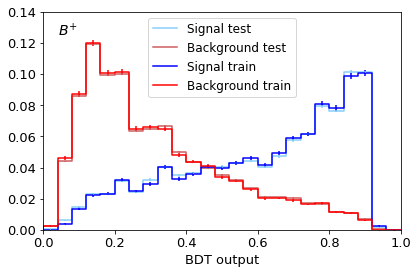

In [8]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 13}
matplotlib.rc('font', **font)
BP_trainer.PlotClassifiers(bins=25,output='BP_classifier',textlabel=r"$B^{+}$",test_cut='btag_m_bc >= 5.27')

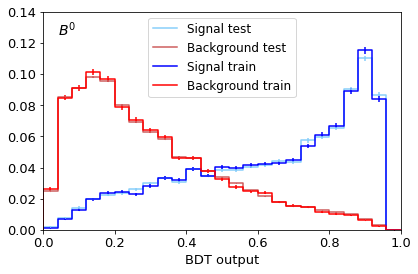

In [9]:
B0_trainer.PlotClassifiers(bins=25,output='B0_classifier',textlabel=r"$B^{0}$",test_cut='btag_m_bc >= 5.27')

[1.0, 1.0, 0.9995204519584228, 0.9977441159476883, 0.9933242170544743, 0.9869701421012962, 0.978884385388821, 0.9672600940474906, 0.9557683250790021, 0.9445721445114161, 0.932922265652231, 0.9175830376849239, 0.901501506584778, 0.8894280276867713, 0.877237333594604, 0.86077204741136, 0.8450167821714776, 0.8278952170293344, 0.8049209308412906, 0.7908778796913124, 0.7700117804846215, 0.7519422717497676, 0.73370999027997, 0.712361532486639, 0.694112774158744, 0.6747563912570149, 0.6535243307835437, 0.6305435135233474, 0.6104239126866511, 0.5917496560177727, 0.5662918790527558, 0.5460225227959407, 0.525984055619317, 0.5018090427280116, 0.4787604178121581, 0.4553329550770989, 0.42137092129059317, 0.39081421889045936, 0.36013580923444877, 0.32120730543328974, 0.280674960169114, 0.247691382724759, 0.20411620047444634, 0.15752728270767435, 0.10300981088143586, 0.047153626503318016, 0.0018184770260532028, 0.00017618694970021048, 1.3698036585295735e-05, 0.0, 0.0] [0.0, 4.172870839547205e-05, 0.0

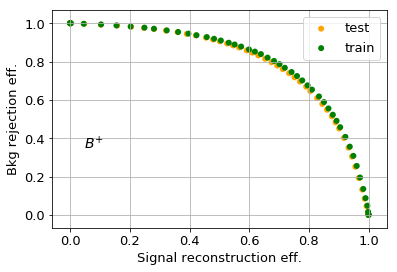

In [10]:
matplotlib.rc('font', **font)
BP_trainer.plotROCcurve(output='BP_ROC',textlabel=r"$B^{+}$", test_cut='btag_m_bc >= 5.27')

[1.0, 0.9998886787559729, 0.9979556204361892, 0.9944827924440748, 0.9901599927280235, 0.9844087595774226, 0.9758758637140263, 0.9666870978536547, 0.9560983610951463, 0.9458267298403431, 0.933722572987052, 0.9215437632870956, 0.9103052567740021, 0.8985509641735493, 0.8842682288489941, 0.8695781898100903, 0.8545153612637593, 0.83859473481587, 0.8210215862511766, 0.8062932645005264, 0.7905095073387338, 0.7727517699498534, 0.7513831525365862, 0.7324656954507638, 0.716747568000871, 0.6978134620996645, 0.678344220529507, 0.6610393055550274, 0.6398429799955458, 0.6188822685394467, 0.5991938977526555, 0.5761732017048878, 0.5574992803823372, 0.5337398411519764, 0.513142627181322, 0.4907582852361417, 0.46977782779972466, 0.4376950850887174, 0.4123655424919433, 0.3803298414531853, 0.35266503877624583, 0.32230880317463695, 0.2874257679514835, 0.2489518093345754, 0.19707317750868492, 0.1447133613265387, 0.08697049197043448, 0.01988725472181952, 0.00014156944750457094, 0.0, 0.0] [0.0, 0.001106774663

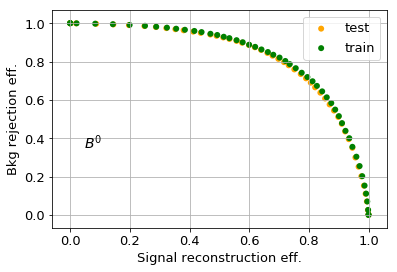

In [11]:
B0_trainer.plotROCcurve(output='B0_ROC',textlabel=r"$B^{0}$", test_cut='btag_m_bc >= 5.27')

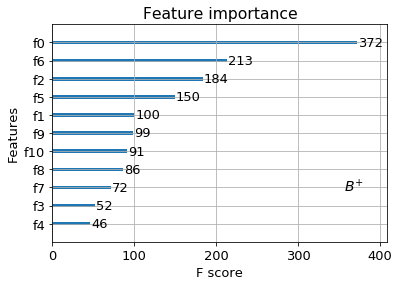

In [12]:
BP_trainer.plotVariablesByImportance(output='BP_feature_ranking',textlabel=r"$B^{+}$")

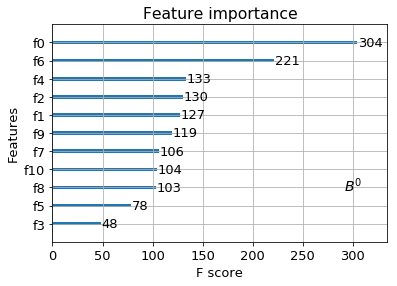

In [13]:
B0_trainer.plotVariablesByImportance(output='B0_feature_ranking',textlabel=r"$B^{0}$")

In [14]:
del(B0_data)
del(BP_data)

# Save output 

In [15]:
from importlib import reload 
import BDT
reload(BDT.EventPreprocessor)
from BDT.EventPreprocessor import EventPreprocessor
data = {}
data['ulnu_ch'] = BP_trainer.GetSignalData()
data['ulnu_md'] = B0_trainer.GetSignalData()
data['clnu_ch'] = BP_trainer.GetBackgroundData()
data['clnu_md'] = B0_trainer.GetBackgroundData()
del(BP_trainer)
del(B0_trainer)

In [16]:
from BDT.EventPreprocessor import EventPreprocessor

outp = EventPreprocessor(data,'tree',usereadroot=False)
outp.CombineMultiple(['ulnu_ch','ulnu_md'],'ulnu')
outp.CombineMultiple(['clnu_ch','clnu_md'],'clnu')
outp.ApplyOneMask("BMeson == 'ch'",'ulnu','ulnu_charged')
outp.ApplyOneMask("BMeson == 'md'",'ulnu','ulnu_mixed')
outp.ApplyOneMask("BMeson == 'ch'",'clnu','clnu_charged')
outp.ApplyOneMask("BMeson == 'md'",'clnu','clnu_mixed')
outp.WriteFile('ulnu_mixed', output_path + 'ulnu_md_10s_BDT.root')
outp.WriteFile('ulnu_charged',output_path + 'ulnu_ch_10s_BDT.root')
outp.WriteFile('clnu_mixed',output_path + 'clnu_md_sub_BDT.root')
outp.WriteFile('clnu_charged',output_path + 'clnu_ch_sub_BDT.root')

/cvmfs/belle.cern.ch/ubuntu1804/externals/v01-08-00/Linux_x86_64/common/lib/python3.6/site-packages/root_numpy/_tree.py:575: UserWarning: converter for dtype('O') is not implemented (skipping)
  cobj = _librootnumpy.array2tree_toCObj(arr, name=name, tree=incobj)


In [17]:
del outp, data

# Ruunig on DATA

In [18]:
mainpath = '/scratch/lcao1/Mac_code/dataset_2020/'
df_data = read_root(mainpath + 'data/output_data_all_20200917.root','tree',where='presel_gen==1')

In [19]:
len(df_data)

612777

In [20]:
import BDT
from BDT.EventPreprocessor import EventPreprocessor
import numpy as np
df_data['Index']= df_data.index
data = { 
        'data' : df_data

}
p = EventPreprocessor(data,'tree')

p.AddNewColumnToAll('vertexfit', lambda df: np.where((df['gx_vtx_chi2']>0)&(df['gx_vtx_dgf']>0), np.log10(df.gx_vtx_chi2/df.gx_vtx_dgf), -100))
p.FillNaNs(10000)


# Get data back from event processor split into ulnu and clnu 

data = p.GetDataframe('data')

#Append data


# Split into B0 and B+
B0_data = data.query('((abs(btag_pcode_b) == 511))')
BP_data = data.query('((abs(btag_pcode_b) != 511))')

/gpfs/share/home/lcao1/.local/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
import BDT
#reload(BDT.XGBoostInference)
from BDT.XGBoostInference import XGBoostInference
features = ['gmiss_m2','event_q','event_nk', 'event_nks', 'veto_slowCharPi_missM2', 'veto_slowNeuPi_missM2', 'vertexfit', 'veto_slowNeuPi_cos_ThetaC', 'veto_slowCharPi_cos_ThetaC', 'veto_slowCharPi_cos_BY', 'veto_slowNeuPi_cos_BY']
B0_inferer = XGBoostInference(output_path + 'mixed_BDT',features)
BP_inferer = XGBoostInference(output_path + 'charged_BDT',features)
B0_inferer.SetData(B0_data)
B0_inferer.Apply()
BP_inferer.SetData(BP_data)
BP_inferer.Apply()

/gpfs/share/home/lcao1/.local/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/gpfs/share/home/lcao1/.local/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [22]:
from BDT.EventPreprocessor import EventPreprocessor

data = {}
data['data_ch'] = BP_inferer.GetData()
data['data_md'] = B0_inferer.GetData()
outp = EventPreprocessor(data,'tree')
outp.CombineMultiple(['data_ch','data_md'],'datatotal')
outp.WriteFile('datatotal',output_path + 'data_BDT.root')

In [23]:
del outp, data

# Running on CONT

In [24]:
mainpath = '/scratch/lcao1/Mac_code/dataset_2020/BDT/input_ready/'
df_charm=read_root(mainpath +'charm_presel.root','tree')
df_uds=read_root(mainpath +'uds_presel.root','tree')

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from BDT.EventPreprocessor import EventPreprocessor


data = { 'charm' : df_charm,
         'uds' : df_uds}

# Do common event processing on datasets 
p = EventPreprocessor(data,'tree',usereadroot=False)

p.Combine(('uds','uds'),('charm','c'),'cont','BMeson')



# Get data back from event processor split into ulnu and clnu 
cont = p.GetDataframe('cont')

# Split into B0 and B+
B0_cont_data = cont.query('((abs(btag_pcode_b) == 511))')
BP_cont_data = cont.query('((abs(btag_pcode_b) != 511))')


In [26]:
#from importlib import reload 
import BDT
#reload(BDT.XGBoostInference)
from BDT.XGBoostInference import XGBoostInference
features = ['gmiss_m2', 'event_q','event_nk', 'event_nks', 'veto_slowCharPi_missM2', 'veto_slowNeuPi_missM2', 'vertexfit', 'veto_slowNeuPi_cos_ThetaC', 'veto_slowCharPi_cos_ThetaC', 'veto_slowCharPi_cos_BY', 'veto_slowNeuPi_cos_BY']
B0_inferer = XGBoostInference(output_path + 'mixed_BDT',features)
BP_inferer = XGBoostInference(output_path + 'charged_BDT',features)
B0_inferer.SetData(B0_cont_data)
B0_inferer.Apply()
BP_inferer.SetData(BP_cont_data)
BP_inferer.Apply()


In [27]:
from BDT.EventPreprocessor import EventPreprocessor
data = {}
data['cont_ch'] = BP_inferer.GetData()
data['cont_md'] = B0_inferer.GetData()
outp = EventPreprocessor(data,'tree')
outp.CombineMultiple(['cont_ch','cont_md'],'cont')
outp.ApplyOneMask("BMeson == 'c'",'cont','charm')
outp.ApplyOneMask("BMeson == 'uds'",'cont','uds')
outp.WriteFile('charm',output_path + 'charm_BDT.root')
outp.WriteFile('uds',output_path + 'uds_BDT.root')

In [28]:
del outp, data

# Running on the rest generic

In [35]:
mainpath = '/scratch/lcao1/Mac_code/dataset_2020/BDT/input_ready/'
df_ch_rest = read_root(mainpath +'c_ch_presel_rest.root','tree')
#df_md_rest =read_root(mainpath +'c_md_presel_rest.root','tree')
df_data = df_ch_rest

In [37]:
import BDT
from BDT.EventPreprocessor import EventPreprocessor
import numpy as np
df_data['Index']= df_data.index
data = { 
        'data' : df_data

}
p = EventPreprocessor(data,'tree')


data = p.GetDataframe('data')

# Split into B0 and B+
B0_data = data.query('((abs(btag_pcode_b) == 511))')
BP_data = data.query('((abs(btag_pcode_b) != 511))')

In [38]:
import BDT
#reload(BDT.XGBoostInference)
from BDT.XGBoostInference import XGBoostInference
features = ['gmiss_m2','event_q','event_nk', 'event_nks', 'veto_slowCharPi_missM2', 'veto_slowNeuPi_missM2', 'vertexfit', 'veto_slowNeuPi_cos_ThetaC', 'veto_slowCharPi_cos_ThetaC', 'veto_slowCharPi_cos_BY', 'veto_slowNeuPi_cos_BY']
B0_inferer = XGBoostInference(output_path + 'mixed_BDT',features)
BP_inferer = XGBoostInference(output_path + 'charged_BDT',features)
B0_inferer.SetData(B0_data)
B0_inferer.Apply()
BP_inferer.SetData(BP_data)
BP_inferer.Apply()

In [39]:
from BDT.EventPreprocessor import EventPreprocessor

data = {}
data['data_ch'] = BP_inferer.GetData()
data['data_md'] = B0_inferer.GetData()
outp = EventPreprocessor(data,'tree')
outp.CombineMultiple(['data_ch','data_md'],'datatotal')
outp.WriteFile('datatotal',output_path + 'clnu_ch_rest_BDT.root')

In [40]:
del outp, data, df_data, BP_inferer, B0_inferer

Combine two parts of clnu

In [3]:
ch_500k = read_root(output_path +'clnu_ch_sub_BDT.root','tree')
ch_rest = read_root(output_path +'clnu_ch_rest_BDT.root','tree')

ch_rest['TestTrainWeight'] =1
ch_rest['Train'] =0

In [4]:
ch_all = ch_500k.append(ch_rest)

In [5]:
del ch_500k, ch_rest

In [6]:
for i in ch_all.columns:
    if "FF" in i :       
        ch_all[i] = ch_all[i].fillna(1)

In [7]:
ch_all.to_root(output_path +'clnu_ch_BDT.root','tree')

In [11]:
del ch_all

In [12]:
md_500k = read_root(output_path +'clnu_md_sub_BDT.root','tree')
md_rest = read_root(output_path +'clnu_md_rest_BDT.root','tree')
md_rest['TestTrainWeight'] =1
md_rest['Train'] =0

In [15]:
len(md_all.loc[md_all.Train==1,:])

30291

In [13]:
md_all = md_500k.append(md_rest)
del md_500k,md_rest

In [16]:
for i in md_all.columns:
    if "FF" in i :    
        md_all[i] = md_all[i].fillna(1)

In [17]:
md_all.to_root(output_path +'clnu_md_BDT.root','tree')

Running on the other ulnu

In [3]:
mainpath = '/scratch/lcao1/Mac_code/dataset_2020/mc_ulnu/combined_hybrid/'
#mainpath = '/scratch/lcao1/Mac_code/dataset_2020/specialMC/mcCorr/'
df_ulnu_ch = read_root(mainpath +'output_hybrid_charged_DFNssDown_20200917_10s_all_mcCorr_FF_wHySys.root','tree',
                    where='presel_gen==1')
df_ulnu_md = read_root(mainpath +'output_hybrid_mixed_DFNssDown_20200917_10s_all_mcCorr_FF_wHySys.root','tree',
                    where='presel_gen==1')

In [4]:
# skip this cell for speicalMC
df_ulnu_ch = ulnu_BR(df_ulnu_ch, 'truth_xu_pdg')
df_ulnu_ch= add_b2u_weights(df_ulnu_ch)

df_ulnu_md = ulnu_BR(df_ulnu_md, 'truth_xu_pdg')
df_ulnu_md= add_b2u_weights(df_ulnu_md)

df_ulnu_ch = fill_nan_Xc_col(df_ulnu_ch)
df_ulnu_md = fill_nan_Xc_col(df_ulnu_md)

df_ulnu_ch = manage_variables(df_ulnu_ch)
df_ulnu_md = manage_variables(df_ulnu_md)

/gpfs/share/home/lcao1/.local/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
def get_all_norm_w(df):
    tot_central_weight = 1.
    
    for i in ['PID_w_0', 'ks_w_0', 'slowpi_w_0', 'tag_w_0', 
              'hybrid_weights', '_b2u_FF_weight_',
              'C_B_fcen',
              'Xc_BR_0',
              'Dlnu_FF_weight', 
              'Dstlnu_FF_weight', 
              'FF_Done_nominal','FF_Dprimeone_nominal','FF_Dzerostar_nominal','FF_Dtwostar_nominal'
             ]:
        
        if i in df.columns:
            
            if df[i].isnull().any() :
            
                df[i] = df[i].fillna(1)
            tot_central_weight *= df[i]
           
     
    df['tot_w_0'] = tot_central_weight
    return df

def clean_nan_in_var(df):
    
    df['TestTrainWeight'] =1
    df['Train'] =0
    
    keys = df.columns[df.columns.str.startswith(pat = 'veto_slow')]
    for i in keys:
         if df[i].isnull().any() :
            
                df[i] = df[i].fillna(10000)
    return df

In [6]:
df_ulnu_ch = get_all_norm_w(df_ulnu_ch)
df_ulnu_md = get_all_norm_w(df_ulnu_md)

df_ulnu_ch['f_stream'] = 1/10 #1/10   # specialMC: 1/20
df_ulnu_md['f_stream'] = 1/10 #1/10

df_ulnu_ch = clean_nan_in_var(df_ulnu_ch)
df_ulnu_md = clean_nan_in_var(df_ulnu_md)

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from BDT.EventPreprocessor import EventPreprocessor


data = { 'charged' : df_ulnu_ch,
         'mixed' : df_ulnu_md}

# Do common event processing on datasets 
p = EventPreprocessor(data,'tree',usereadroot=False)

p.Combine(('charged','charged'),('mixed','mixed'),'com','BMeson')



# Get data back from event processor split into ulnu and clnu 
cont = p.GetDataframe('com')

# Split into B0 and B+
B0_cont_data = cont.query('((abs(btag_pcode_b) == 511))')
BP_cont_data = cont.query('((abs(btag_pcode_b) != 511))')


In [8]:
#from importlib import reload 
import BDT
#reload(BDT.XGBoostInference)
from BDT.XGBoostInference import XGBoostInference
features = ['gmiss_m2', 'event_q','event_nk', 'event_nks', 'veto_slowCharPi_missM2', 'veto_slowNeuPi_missM2', 'vertexfit', 'veto_slowNeuPi_cos_ThetaC', 'veto_slowCharPi_cos_ThetaC', 'veto_slowCharPi_cos_BY', 'veto_slowNeuPi_cos_BY']
B0_inferer = XGBoostInference(output_path + 'mixed_BDT',features)
BP_inferer = XGBoostInference(output_path + 'charged_BDT',features)
B0_inferer.SetData(B0_cont_data)
B0_inferer.Apply()
BP_inferer.SetData(BP_cont_data)
BP_inferer.Apply()


/gpfs/share/home/lcao1/.local/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/gpfs/share/home/lcao1/.local/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
from BDT.EventPreprocessor import EventPreprocessor
data = {}
data['com_ch'] = BP_inferer.GetData()
data['com_md'] = B0_inferer.GetData()
outp = EventPreprocessor(data,'tree')
outp.CombineMultiple(['com_ch','com_md'],'com')
outp.ApplyOneMask("BMeson == 'charged'",'com','charged')
outp.ApplyOneMask("BMeson == 'mixed'",'com','mixed')
outp.WriteFile('charged',output_path + 'ulnu_ch_10s_DFNssDown_BDT.root')
outp.WriteFile('mixed',output_path + 'ulnu_md_10s_DFNssDown_BDT.root')

/cvmfs/belle.cern.ch/ubuntu1804/externals/v01-08-00/Linux_x86_64/common/lib/python3.6/site-packages/root_numpy/_tree.py:575: UserWarning: converter for dtype('O') is not implemented (skipping)
  cobj = _librootnumpy.array2tree_toCObj(arr, name=name, tree=incobj)


In [10]:
del data, outp, df_ulnu_ch, df_ulnu_md